### Import the necessary libraries.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Load the customer_value_analysis.csv into the variable customer_df.

In [2]:
data = pd.read_csv("files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv")

### First look at its main features (head, shape, info).

In [3]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
data.shape

(9134, 24)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

### Rename the columns so they follow the PE8 (snake case: lowecase_with_underscores)

In [6]:
def headers_rename(data):
    data.columns = data.columns.str.lower().str.replace(' ', '_')
    
    return data

data = headers_rename(data)
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### Change the type of effective_to_date column to DateTime format.

In [7]:
import time
from datetime import date
from datetime import datetime
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'], format='%m/%d/%y')
data.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

### Check NaN values per column.

In [8]:
data.isnull().sum()/len(data)

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

### Define a function that given an input dataframe, returns two dataframes: one with numerical columns and another with categorical columns of the input dataframe.

In [9]:
def num_cat_split(data):
    num_cols = data.select_dtypes(include = np.number).columns
    cat_cols = data.select_dtypes(include = ["object", "datetime"]).columns
    
    num_data = data[num_cols]
    cat_data = data[cat_cols]
    
    return num_data, cat_data

num_data, cat_data = num_cat_split(data)

### Drop any ID column.

In [10]:
#cat_data = cat_data.drop(["customer"], axis=1)
cat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer           9134 non-null   object        
 1   state              9134 non-null   object        
 2   response           9134 non-null   object        
 3   coverage           9134 non-null   object        
 4   education          9134 non-null   object        
 5   effective_to_date  9134 non-null   datetime64[ns]
 6   employmentstatus   9134 non-null   object        
 7   gender             9134 non-null   object        
 8   location_code      9134 non-null   object        
 9   marital_status     9134 non-null   object        
 10  policy_type        9134 non-null   object        
 11  policy             9134 non-null   object        
 12  renew_offer_type   9134 non-null   object        
 13  sales_channel      9134 non-null   object        
 14  vehicle_

### Get the correlation matrix for the numerical variables. What is the pair of numerical variables that have the highest correlation? It makes sense, why?

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

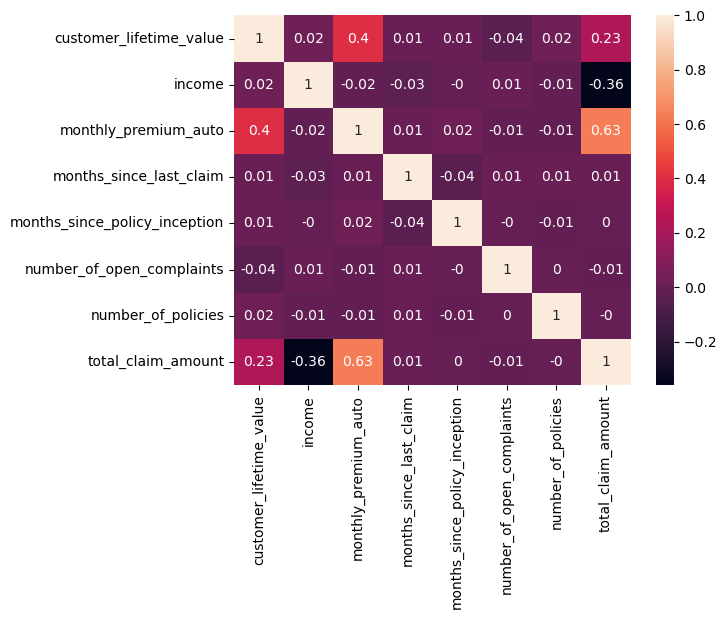

In [12]:
correlations_matrix = round(num_data.corr(),2)
sns.heatmap(correlations_matrix, annot=True)
plt.show()

### Define a function that takes a pandas DataFrame as an input and returns two pandas DataFrames: the first containing numerical continuous columns and the second containing numerical discrete columns of the input dataframe. To this end, it might be helpful to count the number of unique values. The function must have an optional argument set by default to 36 to discriminate between continuous and discrete columns. Then, use it to create two new dataframes: continuous_df and discrete_df.

In [13]:
num_data.nunique()

customer_lifetime_value          8041
income                           5694
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
total_claim_amount               5106
dtype: int64

In [14]:
def continuous_descrete_split(num_data, nunique_set = 36):
    cont_cols = []
    disc_cols = []
    
    for col in num_data:
        if num_data[col].nunique() >= nunique_set:
            cont_cols.append(col)
        else:
            disc_cols.append(col)
            
    continuous_data = num_data[cont_cols]
    discrete_data = num_data[disc_cols]

    return continuous_data, discrete_data

continuous_data, discrete_data = continuous_descrete_split(num_data)

In [15]:
continuous_data.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879


In [16]:
discrete_data.head()

,number_of_open_complaints,number_of_policies
0,0,1
1,0,8
2,0,2
3,0,7
4,0,1


### Create a function to create a barplot for all the columns of the discrete_df using seaborn, and set the figuresize = (16,16).

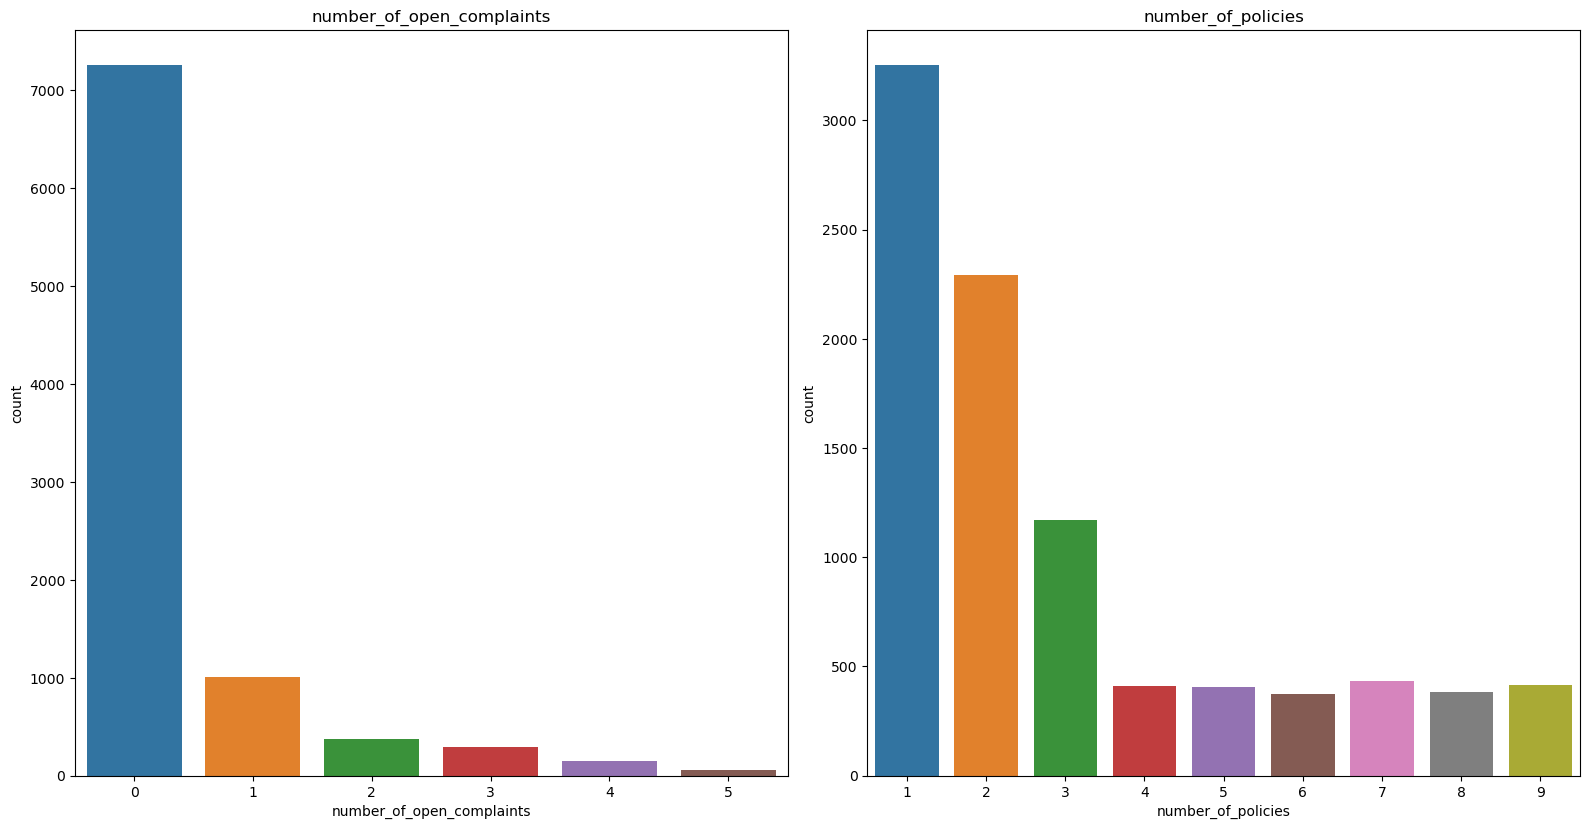

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_discrete_data(discrete_data):
   
    plt.figure(figsize=(16, 16))
    for i, col in enumerate(discrete_data.columns):
        plt.subplot(len(discrete_data.columns)//2 + 1, 2, i+1)
        sns.countplot(x=discrete_data[col])
        plt.title(col)
    plt.tight_layout()
    plt.show()

plot_discrete_data(discrete_data)

Create a function to create a histogram for all the columns of the continuous_df using seaborn, and set the figuresize = (16,16)

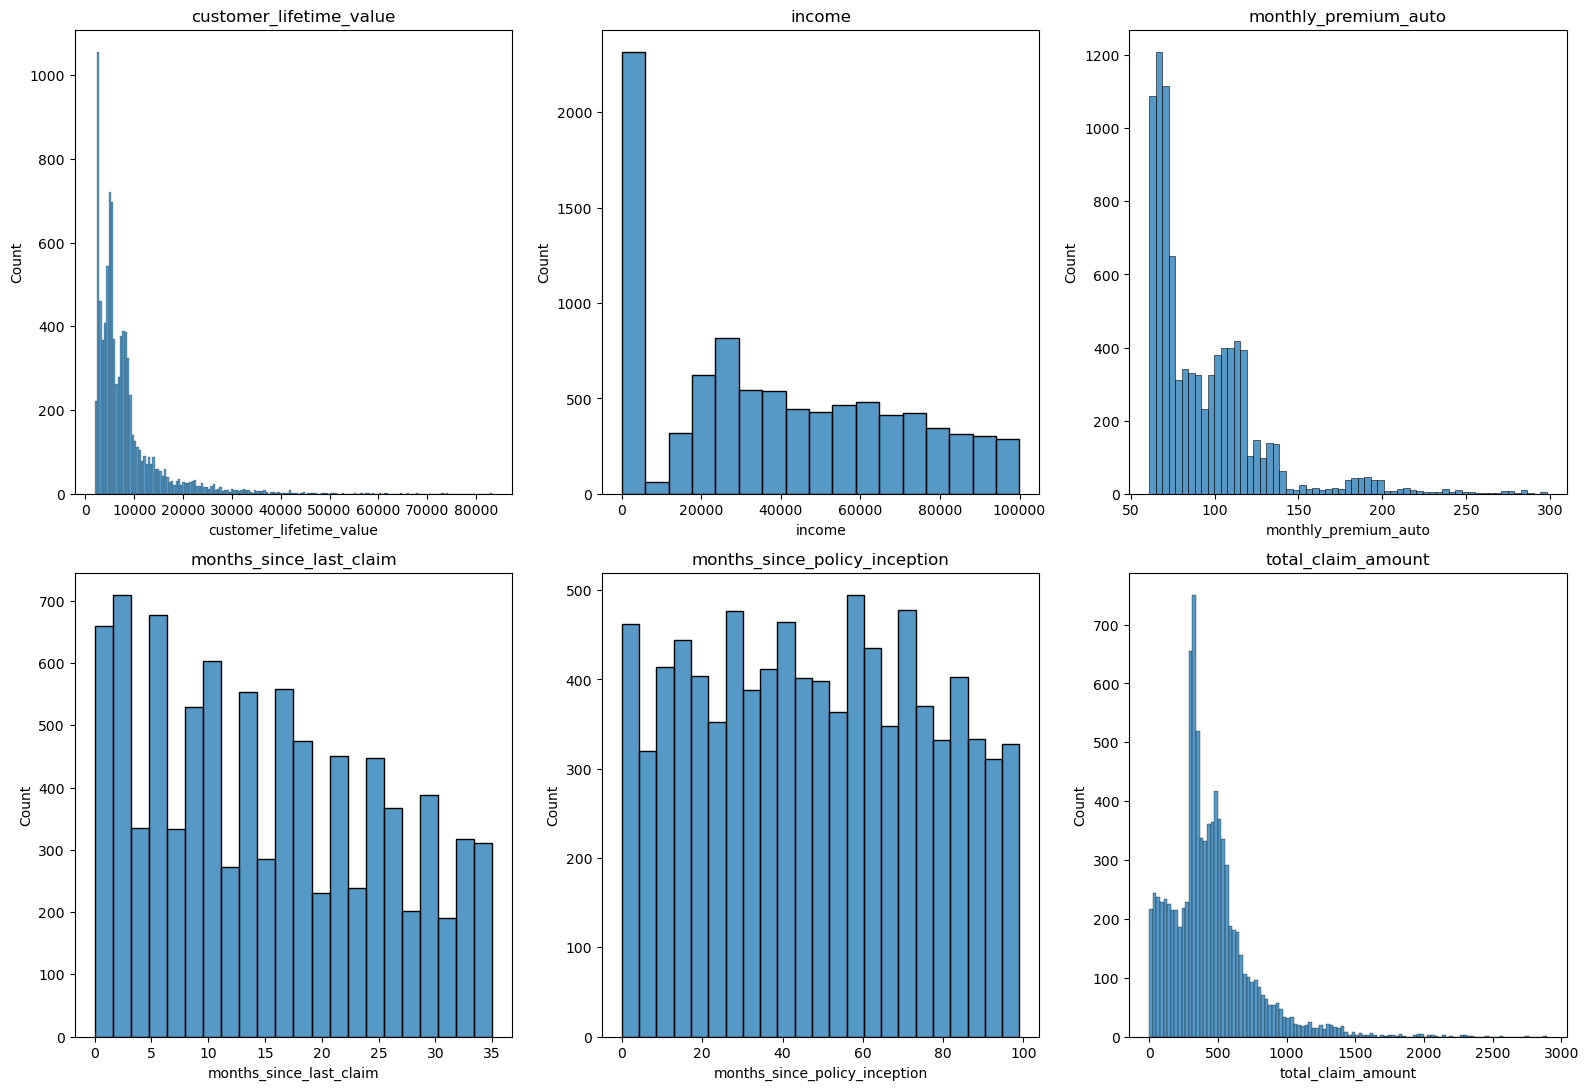

In [18]:
def plot_continuous_data(continuous_data):
   
    plt.figure(figsize=(16, 16))
    for i, col in enumerate(continuous_data.columns):
        plt.subplot(len(continuous_data.columns)//3 + 1, 3, i+1)
        sns.histplot(continuous_data[col])
        plt.title(col)
    plt.tight_layout()
    plt.show()

plot_continuous_data(continuous_data)

### According to the previous histogram plots, do you think that you will have to apply any transformation?

Yes, the transformations will be needed because all the columns have a very different range of values and the distributions are very skewed.I would use both a transformer and a scaler.

### Look for outliers in the continuous variables that you have found. Hint: There was a good plot to do that. Define a function to create this kind of plot for the continuous_df.

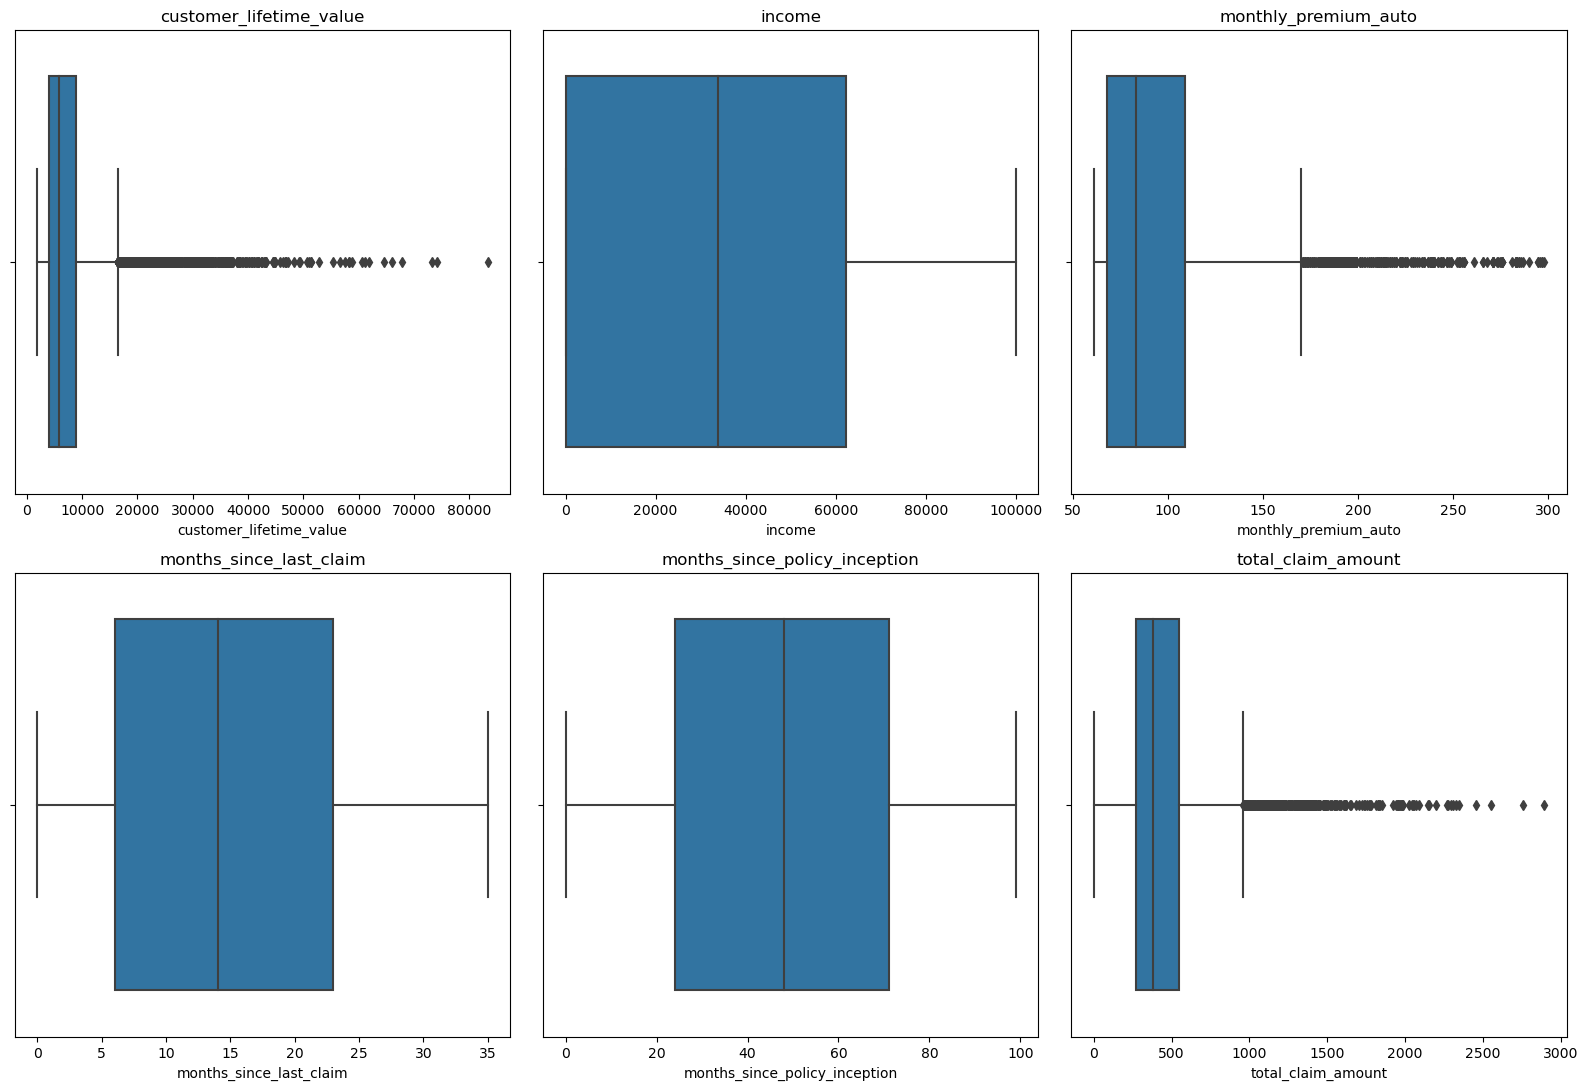

In [19]:
def outliers_continuous_data(continuous_data):
   
    plt.figure(figsize=(16, 16))
    for i, col in enumerate(continuous_data.columns):
        plt.subplot(len(continuous_data.columns)//3 + 1, 3, i+1)
        sns.boxplot(x=continuous_data[col])
        plt.title(col)
    plt.tight_layout()
    plt.show()

outliers_continuous_data(continuous_data)

## Lab Cleaning Categorical Data

1. Define a function that given a pandas DataFrame as input creates a seaborn countplot of each categorical column. Make sure to sort the bars by frequency ie: the most frequent values should be placed first. Hint: use .value_counts(). In addition, if the amount of unique values of a categorical column (cardinality) is six or more, the corresponding countplot should have the bars placed on the y-axis instead of the x-axis.

In [20]:
cat_data.head(2)

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize


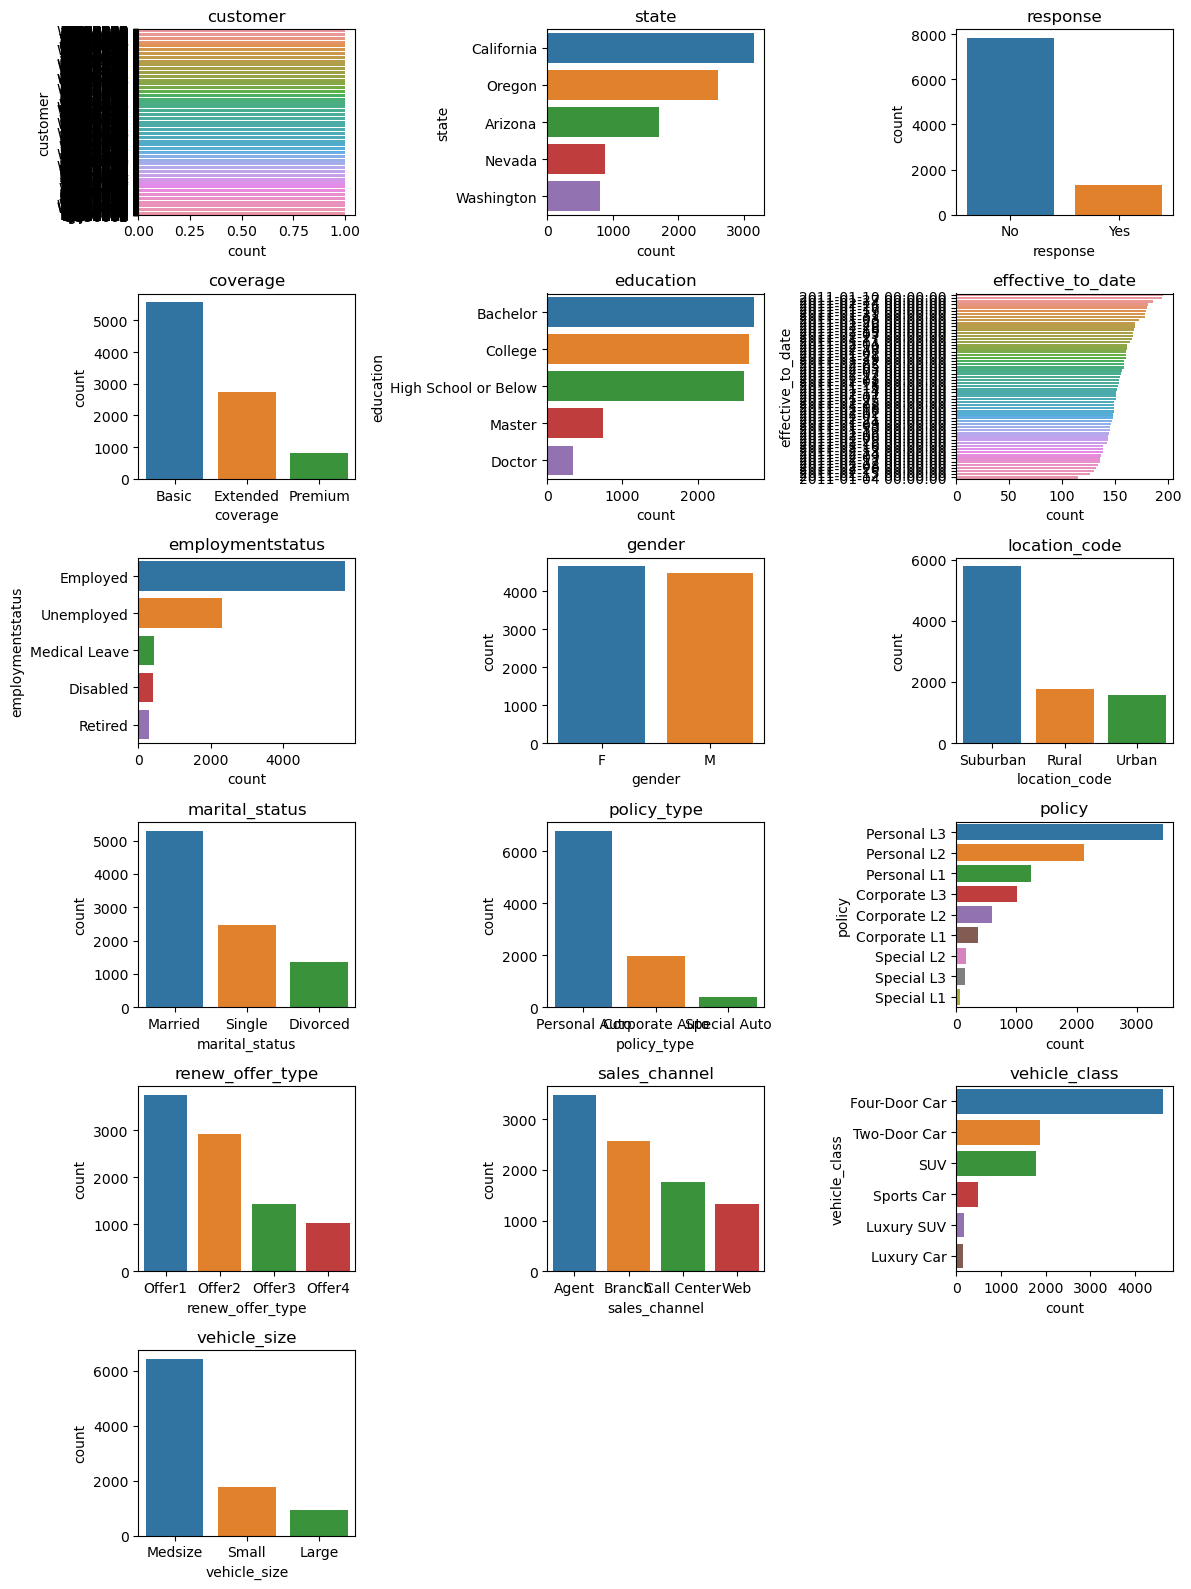

In [21]:
def plot_cat_data(cat_data):
   
    plt.figure(figsize=(12, 16))
    for i, col in enumerate(cat_data.columns):
        plt.subplot(len(cat_data.columns)//3 + 1, 3, i+1)
        if len(cat_data[col].unique()) < 5:
            sns.countplot(x=cat_data[col], order= cat_data[col].value_counts(dropna=False).index)
        else:
            sns.countplot(y=cat_data[col], order= cat_data[col].value_counts(dropna=False).index)
        plt.title(col)
    plt.tight_layout()
    plt.show()

plot_cat_data(cat_data)

##### I use the cardinality of 5 or more for the y-axis because otherwise the chart looks too busy.

2. policy_type and policy columns are redundant, and what's worse policy column has a lot of possible unique values (high cardinality) which will be problematic when they will be dummified with an OneHotEncoder because we will increase a lot the number of columns in the dataframe. Drop the column policy_type and transform the column policy to three possible values: L1, L2, and L3 using a function.

In [22]:
#dropping policy_type
cat_data = cat_data.drop(["policy_type"], axis = 1)
cat_data.columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective_to_date', 'employmentstatus', 'gender', 'location_code',
       'marital_status', 'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [23]:
#changing the policy column:
def policy_change(cat_data):
    cat_data["policy"] = cat_data["policy"].replace(["Personal L1", "Corporate L1", "Special L1"], ["L1", "L1","L1"])
    cat_data["policy"] = cat_data["policy"].replace(["Personal L2", "Corporate L2", "Special L2"], ["L2", "L2", "L2"])
    cat_data["policy"] = cat_data["policy"].replace(["Personal L3", "Corporate L3", "Special L3"], ["L3", "L3", "L3"])
    
policy_change(cat_data)
cat_data.head()

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,L1,Offer1,Agent,Four-Door Car,Medsize


3. Time dependency analysis. Use a seaborn line plot using the column effective_to_date to see if total_claim_amount is bigger at some specific dates. Use a figsize=(10,10)

<AxesSubplot:xlabel='effective_to_date', ylabel='total_claim_amount'>

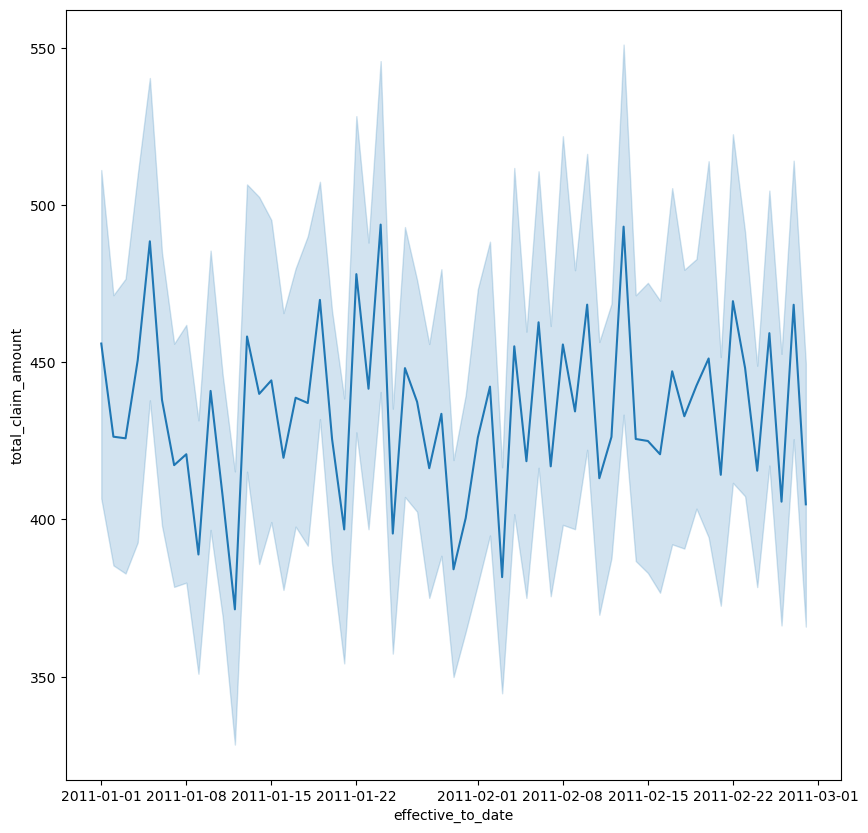

In [24]:
plt.figure(figsize=(10, 10))
sns.lineplot(data=data, x="effective_to_date", y="total_claim_amount")

##### Yes, it looks like there are certain peaks during this timeframe, when the claim amount if higher, but it does not look like there is a pattern

4. To continue the analysis define an empty pandas DataFrame, and add the following new columns:
- day with the day number of effective_to_date
- day_name with the day NAME of effective_to_date
- week with the week of effective_to_date
- month with the month NAME of effective_to_date
- total_claim_amount with total_claim_amount

In [25]:
claims_by_date = pd.DataFrame(columns=["day", "day_name", "week", "month", "total_claim_amount"])
claims_by_date["day"] = data["effective_to_date"].dt.day
claims_by_date["day_name"] = data["effective_to_date"].dt.day_name()
claims_by_date["week"] = data["effective_to_date"].dt.isocalendar().week
claims_by_date["month"] = data["effective_to_date"].dt.month_name()
claims_by_date["total_claim_amount"] = data["total_claim_amount"]

claims_by_date.head()

,day,day_name,week,month,total_claim_amount
0,24,Thursday,8,February,384.811147
1,31,Monday,5,January,1131.464935
2,19,Saturday,7,February,566.472247
3,20,Thursday,3,January,529.881344
4,3,Thursday,5,February,138.130879


5. Compute the total target column aggregated day_name rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_days)

In [26]:
total_target = claims_by_date.groupby(["day_name"])["total_claim_amount"].sum().round(2)
new_index = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
total_target = total_target.reindex(new_index)
total_target

day_name
Monday       655689.71
Tuesday      502518.93
Wednesday    541563.05
Thursday     541820.80
Friday       533658.79
Saturday     608060.10
Sunday       581655.66
Name: total_claim_amount, dtype: float64

6. Use a seaborn line plot to plot the previous series. Do you see some differences by day of the week? -->

<AxesSubplot:xlabel='day_name', ylabel='values'>

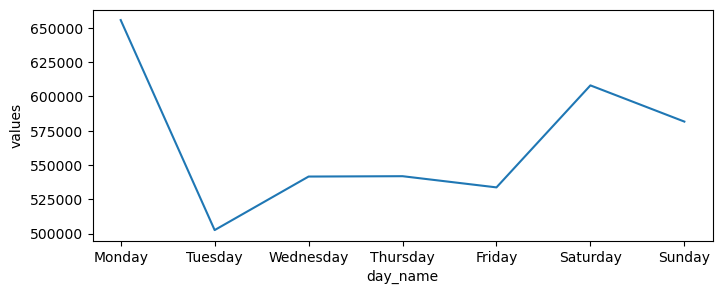

In [27]:
plt.figure(figsize=(8, 3))
total_target_df = pd.DataFrame({'values': total_target}).reset_index()
sns.lineplot(data=total_target_df, x=total_target.index, y="values")

##### Usually Mondays have a peak, maybe because some ppl claim smth that happened during the weekend. But Saturday and Sunday are also higher than the other days.

7. Get the total number of claims by day of the week name and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)

In [28]:
total_number = claims_by_date.groupby(["day_name"])["total_claim_amount"].count()
new_index = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
total_number = total_number.reindex(new_index)
total_number

day_name
Monday       1530
Tuesday      1162
Wednesday    1221
Thursday     1249
Friday       1245
Saturday     1397
Sunday       1330
Name: total_claim_amount, dtype: int64

8. Get the median "target" by day of the week name and then sort the resulting values in descending order using .sort_values()

In [29]:
median_target = claims_by_date.groupby(["day_name"])["total_claim_amount"].median().sort_values(ascending=False)
median_target

day_name
Thursday     395.328407
Wednesday    392.235698
Monday       385.735705
Sunday       383.721164
Saturday     379.200000
Tuesday      378.490829
Friday       371.803029
Name: total_claim_amount, dtype: float64

9. Plot the median "target" by day of the week name using a seaborn barplot

<AxesSubplot:xlabel='day_name', ylabel='values'>

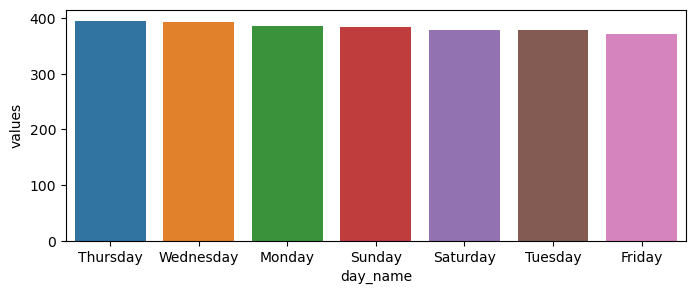

In [30]:
plt.figure(figsize=(8, 3))
median_target_df = pd.DataFrame({'values': median_target}).reset_index()
sns.barplot(data=median_target_df, x=median_target.index, y="values")

10. What can you conclude from this analysis?

##### The  number of claimn per day of week is the highest on Monday, then Saturday, and then Sunday, as well as total target. However we see that the median target amount per day of week is not that different. This could mean that we have a some extreme cases on Monday, where the amount is very high, but the median is not influenced by that.

11. Compute the total target column aggregated month rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)

In [31]:
total_target_month = claims_by_date.groupby(["month"])["total_claim_amount"].sum().round(2)
new_index = ["January", "February"]
total_target_month = total_target_month.reindex(new_index)
total_target_month

month
January     2117142.86
February    1847824.19
Name: total_claim_amount, dtype: float64

12. Can you do a monthly analysis given the output of the previous series? Why?

##### We only have data from 2 month that is not enought to draw any meaningful conclusions. We would need the data at least from the whole year to see some trends.

13. Define a function to remove the outliers of a numerical continuous column depending if a value is bigger or smaller than a given amount of standard deviations of the mean (thr=3).

In [32]:
continuous_data.shape

(9134, 6)

In [33]:
def remove_outliers(df, cols, thr=3):
    for col in cols:
        mean = df[col].mean()
        std = df[col].std()
        lower_bound = mean - thr * std
        upper_bound = mean + thr * std
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

14. Use the previous function to remove the outliers of continuous data and to generate a continuous_clean_df.

In [34]:
continuous_clean_df = remove_outliers(continuous_data, continuous_data.columns, thr=3)
continuous_clean_df.shape

(8575, 6)

15. Concatenate the continuous_cleaned_df, discrete_df, categorical_df, and the relevant column of time_df. After removing outliers the continuous_cleaned dataframe will have fewer rows (when you concat the individual dataframes using pd.concat()) the resulting dataframe will have NaN's because of the different sizes of each dataframe. Use pd.dropna() and .reset_index() to fix the final dataframe.

In [35]:
full_cleaned_df = pd.concat([continuous_clean_df, discrete_data, cat_data, claims_by_date.loc[:, ["day", "month"]]], axis =1).dropna().reset_index()
print(full_cleaned_df.shape)
full_cleaned_df.head()

(8575, 26)


,index,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount,number_of_open_complaints,number_of_policies,customer,...,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,month
0,0,2763.519279,56274.0,69.0,32.0,5.0,384.811147,0,1,BU79786,...,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,24,February
1,1,6979.535903,0.0,94.0,13.0,42.0,1131.464935,0,8,QZ44356,...,F,Suburban,Single,L3,Offer3,Agent,Four-Door Car,Medsize,31,January
2,2,12887.431650,48767.0,108.0,18.0,38.0,566.472247,0,2,AI49188,...,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,19,February
3,3,7645.861827,0.0,106.0,18.0,65.0,529.881344,0,7,WW63253,...,M,Suburban,Married,L2,Offer1,Call Center,SUV,Medsize,20,January
4,4,2813.692575,43836.0,73.0,12.0,44.0,138.130879,0,1,HB64268,...,M,Rural,Single,L1,Offer1,Agent,Four-Door Car,Medsize,3,February


16. Reorder the columns of the dataframe to place 'total_claim_amount' as the last column.

In [36]:
full_cleaned_df.columns

Index(['index', 'customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'total_claim_amount', 'number_of_open_complaints', 'number_of_policies',
       'customer', 'state', 'response', 'coverage', 'education',
       'effective_to_date', 'employmentstatus', 'gender', 'location_code',
       'marital_status', 'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size', 'day', 'month'],
      dtype='object')

In [37]:
full_cleaned_df = full_cleaned_df.reindex(columns=['index', 'customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'customer', 'state', 'response', 'coverage', 'education',
       'effective_to_date', 'employmentstatus', 'gender', 'location_code',
       'marital_status', 'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size', 'day', 'month', 'total_claim_amount'])

In [39]:
full_cleaned_df.head(2)

,index,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,customer,state,...,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,month,total_claim_amount
0,0,2763.519279,56274.0,69.0,32.0,5.0,0,1,BU79786,Washington,...,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,24,February,384.811147
1,1,6979.535903,0.0,94.0,13.0,42.0,0,8,QZ44356,Arizona,...,Suburban,Single,L3,Offer3,Agent,Four-Door Car,Medsize,31,January,1131.464935


17. Turn the response column values into (Yes=1/No=0).

In [45]:
full_cleaned_df["response"] = full_cleaned_df["response"].replace(["Yes", "No"], [1, 0])
full_cleaned_df["response"].unique()

array([0, 1], dtype=int64)

18. Reduce the class imbalance in education by grouping together ["Master","Doctor"] into "Graduate" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.

In [46]:
full_cleaned_df["education"].value_counts()

Bachelor                2585
College                 2531
High School or Below    2441
Master                   690
Doctor                   328
Name: education, dtype: int64

In [55]:
def clean_education(x):
    if x in ["Master", "Doctor"]:
        return "Graduate"
    else:
        return x

full_cleaned_df["education"] = list(map(clean_education,full_cleaned_df["education"]))
full_cleaned_df["education"].value_counts()

Bachelor                2585
College                 2531
High School or Below    2441
Graduate                1018
Name: education, dtype: int64

19. Reduce the class imbalance of the employmentstatus column grouping together ["Medical Leave", "Disabled", "Retired"] into "Inactive" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.

In [56]:
full_cleaned_df["employmentstatus"].value_counts()

Employed         5384
Unemployed       2127
Medical Leave     409
Disabled          381
Retired           274
Name: employmentstatus, dtype: int64

In [58]:
def clean_employmentstatus(x):
    if x in ["Medical Leave", "Disabled", "Retired"]:
        return "Inactive"
    else:
        return x
    
full_cleaned_df["employmentstatus"] = list(map(clean_employmentstatus,full_cleaned_df["employmentstatus"]))
full_cleaned_df["employmentstatus"].value_counts()

Employed      5384
Unemployed    2127
Inactive      1064
Name: employmentstatus, dtype: int64

20. Deal with column Gender turning the values into (1/0).

In [59]:
full_cleaned_df["gender"].value_counts()

F    4383
M    4192
Name: gender, dtype: int64

In [61]:
full_cleaned_df["gender"] = full_cleaned_df["gender"].replace(["F", "M"], [1, 0])
full_cleaned_df["gender"].value_counts()

1    4383
0    4192
Name: gender, dtype: int64

21. Now, deal with vehicle_class grouping together "Sports Car", "Luxury SUV", and "Luxury Car" into a common group called Luxury leaving the other values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.

In [62]:
full_cleaned_df["vehicle_class"].value_counts()

Four-Door Car    4577
Two-Door Car     1869
SUV              1627
Sports Car        430
Luxury Car         41
Luxury SUV         31
Name: vehicle_class, dtype: int64

In [63]:
def clean_vehicle_class(x):
    if x in ["Sports Car", "Luxury SUV", "Luxury Car"]:
        return "Luxury"
    else:
        return x
    
full_cleaned_df["vehicle_class"] = list(map(clean_vehicle_class,full_cleaned_df["vehicle_class"]))
full_cleaned_df["vehicle_class"].value_counts()

Four-Door Car    4577
Two-Door Car     1869
SUV              1627
Luxury            502
Name: vehicle_class, dtype: int64

22. Now it's time to deal with the categorical ordinal columns, assigning a numerical value to each unique value respecting the ìmplicit ordering`. Encode the coverage: "Premium" > "Extended" > "Basic".

In [64]:
full_cleaned_df["coverage"].value_counts()

Basic       5353
Extended    2541
Premium      681
Name: coverage, dtype: int64

In [65]:
coverage_level = {'Premium': 1, 'Extended': 2, 'Basic': 3}
full_cleaned_df["coverage"] = full_cleaned_df["coverage"].map(coverage_level)
full_cleaned_df["coverage"].value_counts()

3    5353
2    2541
1     681
Name: coverage, dtype: int64

23. Encode the column employmentstatus as: "Employed" > "Inactive" > "Unemployed".

In [66]:
employmentstatus_level = {'Employed': 1, 'Inactive': 2, 'Unemployed': 3}
full_cleaned_df["employmentstatus"] = full_cleaned_df["employmentstatus"].map(employmentstatus_level)
full_cleaned_df["employmentstatus"].value_counts()

1    5384
3    2127
2    1064
Name: employmentstatus, dtype: int64

24. Encode the column location_code as: "Urban" > "Suburban" > "Rural".

In [67]:
full_cleaned_df["location_code"].value_counts()

Suburban    5342
Rural       1710
Urban       1523
Name: location_code, dtype: int64

In [68]:
location_code_num = {'Urban': 1, 'Suburban': 2, 'Rural': 3}
full_cleaned_df["location_code"] = full_cleaned_df["location_code"].map(location_code_num)
full_cleaned_df["location_code"].value_counts()

2    5342
3    1710
1    1523
Name: location_code, dtype: int64

25. Encode the column vehicle_size as: "Large" > "Medsize" > "Small".

In [69]:
full_cleaned_df["vehicle_size"].value_counts()

Medsize    6033
Small      1644
Large       898
Name: vehicle_size, dtype: int64

In [70]:
vehicle_size_level = {'Large': 1, 'Medsize': 2, 'Small': 3}
full_cleaned_df["vehicle_size"] = full_cleaned_df["vehicle_size"].map(vehicle_size_level)
full_cleaned_df["vehicle_size"].value_counts()

2    6033
3    1644
1     898
Name: vehicle_size, dtype: int64

26. Get a dataframe with the categorical nominal columns

In [78]:
categorical_columns = full_cleaned_df.select_dtypes(include = ["object"]).drop(["customer"], axis=1)
categorical_columns.head(3)

,state,education,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,month
0,Washington,Bachelor,Married,L3,Offer1,Agent,Two-Door Car,February
1,Arizona,Bachelor,Single,L3,Offer3,Agent,Four-Door Car,January
2,Nevada,Bachelor,Married,L3,Offer1,Agent,Two-Door Car,February


27. Create a list of named levels which that has as many elements as categorical nominal columns. Each element must be another list with all the possible unique values of the corresponding categorical nominal column: ie:
- levels = [ [col1_value1, col1_value2,...], [col2_value1, col2_value2,...], ...]

In [87]:
levels = [[f"{col}_{val}" for val in categorical_columns[col].unique()] for col in categorical_columns]
levels

[['state_Washington',
  'state_Arizona',
  'state_Nevada',
  'state_California',
  'state_Oregon'],
 ['education_Bachelor',
  'education_College',
  'education_Graduate',
  'education_High School or Below'],
 ['marital_status_Married',
  'marital_status_Single',
  'marital_status_Divorced'],
 ['policy_L3', 'policy_L2', 'policy_L1'],
 ['renew_offer_type_Offer1',
  'renew_offer_type_Offer3',
  'renew_offer_type_Offer2',
  'renew_offer_type_Offer4'],
 ['sales_channel_Agent',
  'sales_channel_Call Center',
  'sales_channel_Web',
  'sales_channel_Branch'],
 ['vehicle_class_Two-Door Car',
  'vehicle_class_Four-Door Car',
  'vehicle_class_SUV',
  'vehicle_class_Luxury'],
 ['month_February', 'month_January']]

28. Instantiate an sklearn OneHotEncoder with drop set to first and categories to levels

In [90]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', categories=levels)
encoder = OneHotEncoder().fit(categorical_columns)
#print(encoder.categories_)

encoded = encoder.transform(categorical_columns).toarray()
#print(encoded)
onehot_encoded = pd.DataFrame(encoded,columns=encoder.get_feature_names_out())
onehot_encoded.head()

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,education_Bachelor,education_College,education_Graduate,education_High School or Below,marital_status_Divorced,...,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car,month_February,month_January
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
